100%|██████████| 20218/20218 [00:00<00:00, 2589247.30it/s]
/data/dg2/new_anaconda_20230607/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/data/dg2/new_anaconda_20230607/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/data/dg2/new_anaconda_20230607/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:101: SettingWithCopyWarning: 
A value is t

     PG.ProteinNames  EXP21053_2021ms0300X75_A_GC10_1_1996  \
0        1433B_HUMAN                           2890.564850   
1        1433E_HUMAN                           8944.185837   
2        1433F_HUMAN                           2633.762634   
3        1433G_HUMAN                           1624.346405   
4        1433S_HUMAN                            319.243958   
...              ...                                   ...   
1730     ZNHI3_HUMAN                            308.566956   
1731       ZO2_HUMAN                            711.071594   
1732       ZPI_HUMAN                          19161.450897   
1733     ZSC16_HUMAN                            362.103973   
1734       ZYX_HUMAN                           1614.659576   

      EXP21053_2021ms0396X43_A_GC6_1_3043  \
0                             3009.271759   
1                             5846.318329   
2                             4937.450897   
3                             1670.684265   
4                             

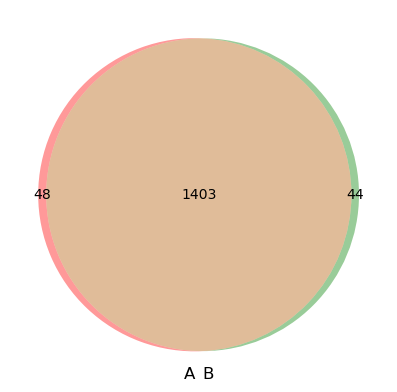

        before  after   得率
整体	1403	397	0.28
HUMAN	1403	397	0.28
median absolute deviation
HUMAN	[0.111, 0.144, 0.094]	mean: 0.116


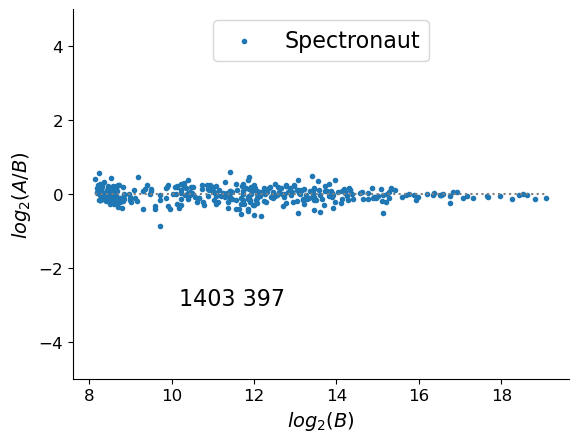

In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import pandas as pd
import os
import numpy as np
import pickle
from matplotlib_venn import venn2
from matplotlib import pyplot as plt
from tqdm import tqdm
# import warnings
# warnings.filterwarnings("ignore")

# In[2]:


# libdir = r'D:\DI-SPA\library\pkl'
# libname = 'human.faims.fixed.decoy.pkl'
# with open(os.path.join(libdir,libname),'rb')as f:
# library = pickle.load(f)
# for key in tqdm(library.keys()):
# library[key]['Species'] = 'HUMAN'

root_path = '/data/dg/CNNp/lib/'
library = np.load(
    root_path + "AD8-300S-directDIA_ModifiedPeptide_DDA_library_im_norm_peak6.npy", allow_pickle=True).item()
for key in tqdm(library.keys()):
    library[key]['Species'] = 'HUMAN'


# In[3]:


dirname = r'D:\DI-SPA\Results\100reps_64bit_csodiaq_human.faims'
# filenames = []
# mzML_names = []
# for i in range(1,101):
# filenames.append('20200719_MAGIC_MCF7_1128repro_'+'%02d'%i)
# mzML_names.append('20200719_MAGIC_MCF7_1128repro_'+'%02d'%i+'.mzML')

filenames = ['EXP21053_2021ms0300X75_A_GC10_1_1996',
             'EXP21053_2021ms0396X43_A_GC6_1_3043',
             'EXP21053_2021ms0397X43_A_BC6_1_3224',
             'EXP21053_2021ms0427X43_A_BC6_1_3430',
             'EXP21053_2021ms0429X43_A_GC6_1_3439',
             'EXP21053_2021ms0432X43_A_BC6_1_3619',
             'EXP21053_2021ms0437X43_A_RC6_1_3624',
             'EXP21053_2021ms0442X43_A_RC6_1_3728']
filenames_A = filenames[:4]
filenames_B = filenames[-4:]

'''
quant_file = np.load(root_path + 'first_win_zero_lfq_MN_Plasma_QC_quant_minmz5.npy', allow_pickle=True)
file_seq_charge, quant_all = quant_file[0], quant_file[1]
lib = np.load(root_path + "20220112_MN_plasma_DDA_library_norm_peak6.npy", allow_pickle=True).item()

# deep identify
# identify = np.load(root_path + 'first_win_zero_lfq_Hela_noRT_FAIMS_identify.npy', allow_pickle=True)
# thresh = 0.018132749944925308
# identify_fdr = {i:[] for i in quant_filenames.keys()}
# for seq_i in range(len(identify[0])):
    # if identify[1][seq_i][1] >= thresh:
        # identify_fdr[identify[0][seq_i][0]].append(identify[0][seq_i][1])
# print(sum([len(v) for v in identify_fdr.values()]))

# CsoDIAq identify
# identify_fdr = np.load('dispa_100reps_searchoutput_identify_all.npy',allow_pickle=True).item()


names = {i:[] for i in filenames}
for seq_i in tqdm(range(len(file_seq_charge))):
    t_file = file_seq_charge[seq_i][0]
    # if file_seq_charge[seq_i][1] not in identify_fdr[t_file]:
        # continue
    t_seq = file_seq_charge[seq_i][1][0]
    t_charge = file_seq_charge[seq_i][1][1]
    t_species = 'HUMAN'
    names[t_file].append([t_seq, t_charge, quant_all[seq_i][0], t_species])
'''


spectronaut_res = pd.read_csv('/data/dg/deep_paper_code/quant_ipynb/deep_learning_dataset-PXD030327_repeat3_protein_Report.tsv', sep='\t')
# spectronaut_res = pd.read_csv('/data/dg/CNNp/label-result/20230919_173817_dataset-7_Report.tsv', sep='\t')
spectronaut_res.columns = list(spectronaut_res.columns[:1]) + list(spectronaut_res.columns[1:].map(lambda x: x.split("] ")[1].split(".d.")[0]))
print(spectronaut_res)

# In[4]:


total_A = pd.DataFrame([])
for i in range(len(filenames_A)):
    df = spectronaut_res[['PG.ProteinNames',
                          filenames_A[i].split("_Slot1-")[-1]]]
    df.columns = ['peptide', 'Coeff']
    df['charge'] = 2
    df['Species2'] = 'HUMAN'
    df['Precursor'] = df[['peptide', 'charge']].apply(
        lambda x: x['peptide']+'_'+str(x['charge']), axis=1)
    df['protein'] = df['peptide'].apply(
        lambda x: 'DECOY_null' if 'DECOY' in x else 'TARGET')
    df = df[df['protein'] == 'TARGET']
    df = df[df['Coeff'] != 'Filtered']
    df['Coeff'] = pd.to_numeric(df['Coeff'], errors='coerce')
    df = df[df['Coeff'] > 0]
    df['A'+str(i+1)] = df['Coeff']
    df = df[['Precursor', 'A'+str(i+1)]]
    if i == 0:
        total_A = total_A.append(df)
    else:
        total_A = total_A.join(df.set_index('Precursor'),
                               on='Precursor', how='outer')


# In[5]:


total_B = pd.DataFrame([])
for i in range(len(filenames_B)):
    df = spectronaut_res[['PG.ProteinNames',
                          filenames_B[i].split("_Slot1-")[-1]]]
    df.columns = ['peptide', 'Coeff']
    df['charge'] = 2
    df['Species2'] = 'HUMAN'
    df['Precursor'] = df[['peptide', 'charge']].apply(
        lambda x: x['peptide']+'_'+str(x['charge']), axis=1)
    df['protein'] = df['peptide'].apply(
        lambda x: 'DECOY_null' if 'DECOY' in x else 'TARGET')
    df = df[df['protein'] == 'TARGET']
    df = df[df['Coeff'] != 'Filtered']
    df['Coeff'] = pd.to_numeric(df['Coeff'], errors='coerce')
    df = df[df['Coeff'] > 0]
    df['B'+str(i+1)] = df['Coeff']
    df = df[['Precursor', 'B'+str(i+1)]]
    if i == 0:
        total_B = total_B.append(df)
    else:
        total_B = total_B.join(df.set_index('Precursor'),
                               on='Precursor', how='outer')


# In[6]:


print(total_A)


# In[7]:


total_A['num_of_nan'] = total_A.T.isna().sum()
total_A = total_A[total_A['num_of_nan'] <= 1]
total_B['num_of_nan'] = total_B.T.isna().sum()
total_B = total_B[total_B['num_of_nan'] <= 1]


# In[8]:


def get_avg_A(x):
    coeffs = []
    for i in range(4):
        coeff = x['A'+str(i+1)]
        if coeff > 0:
            coeffs.append(coeff)
        else:
            pass
    return np.mean(coeffs)


def get_CV_A(x):
    coeffs = []
    for i in range(4):
        coeff = x['A'+str(i+1)]
        if coeff > 0:
            coeffs.append(coeff)
        else:
            pass
    return np.std(coeffs)/np.mean(coeffs)


def get_avg_B(x):
    coeffs = []
    for i in range(4):
        coeff = x['B'+str(i+1)]
        if coeff > 0:
            coeffs.append(coeff)
        else:
            pass
    return np.mean(coeffs)


def get_CV_B(x):
    coeffs = []
    for i in range(4):
        coeff = x['B'+str(i+1)]
        if coeff > 0:
            coeffs.append(coeff)
        else:
            pass
    return np.std(coeffs)/np.mean(coeffs)


# In[9]:


total_A['peptide'] = total_A['Precursor'].apply(lambda x: x.split('_')[0])
total_A_pep = total_A.groupby('peptide').mean().reset_index()
total_A_pep = total_A_pep.drop('num_of_nan', axis=1)
# total_A_pep['avg'] = total_A_pep[['A1','A2','A3','A4','A5']].apply(get_avg_A,axis=1)
# total_A_pep['Log2'] = np.log2(list(total_A_pep['avg']))


total_B['peptide'] = total_B['Precursor'].apply(lambda x: x.split('_')[0])
total_B_pep = total_B.groupby('peptide').mean().reset_index()
total_B_pep = total_B_pep.drop('num_of_nan', axis=1)
# total_B_pep['avg'] = total_B_pep[['B1','B2','B3','B4','B5']].apply(get_avg_B,axis=1)
# total_B_pep['Log2'] = np.log2(list(total_B_pep['avg']))


# In[10]:


if len(total_A_pep['peptide'].values) != len(set(total_A_pep['peptide'].values)):
    print('wrong')
if len(total_B_pep['peptide'].values) != len(set(total_B_pep['peptide'].values)):
    print('wrong')
pep_A = total_A_pep['peptide'].values
pep_B = total_B_pep['peptide'].values


# In[11]:


venn2([set(pep_A), set(pep_B)], ['A', 'B'])
plt.show()


# In[12]:


total_A


# In[13]:


intersection = set(pep_A) & set(pep_B)
inter_A = total_A_pep[total_A_pep['peptide'].isin(intersection)]
inter_B = total_B_pep[total_B_pep['peptide'].isin(intersection)]
total = inter_A.join(inter_B.set_index('peptide'), on='peptide', how='outer')
A_list = []
B_list = []
for i in range(1, 5):
    A_list.append('A'+str(i))
    B_list.append('B'+str(i))
total['avg_A'] = total[A_list].apply(get_avg_A, axis=1)
total['avg_B'] = total[B_list].apply(get_avg_B, axis=1)
total['CV_A'] = total[A_list].apply(get_CV_A, axis=1)
total['CV_B'] = total[B_list].apply(get_CV_B, axis=1)
old_len = len(total)


# In[14]:


def find_label(x):
    charges = [1, 2, 3, 4, 5, 6, 7]
    for charge in charges:
        key = (x, charge)
        if key in library.keys():
            return library[key]['Species']
        else:
            pass
    print('wrong')
    return -1


# In[15]:


total['Species'] = "HUMAN"


# In[16]:


species_cnt1 = np.array([len(total[total['Species'] == 'HUMAN'])])


# In[17]:


total = total[total['CV_A'] <= 0.2]
total = total[total['CV_B'] <= 0.2]
# total.to_csv('MN_Plasma_QC_spectronaut_quant_AB_cv0.1_11-18.csv', index=None)

# In[18]:


np.sum(species_cnt1)


# In[19]:


labels = ['HUMAN']
print('        before  after   得率')
print('整体', old_len, len(total), round(len(total) / old_len, 2), sep='\t')
species_cnt2 = np.array([len(total[total['Species'] == label])
                         for label in labels])
print('HUMAN', species_cnt1[0], species_cnt2[0],
      (species_cnt2 / species_cnt1).round(2)[0], sep='\t')
# print('YEAST', species_cnt1[1], species_cnt2[1], (species_cnt2 / species_cnt1).round(2)[1], sep='\t')
# print('ECOLI', species_cnt1[2], species_cnt2[2], (species_cnt2 / species_cnt1).round(2)[2], sep='\t')
new_len = len(total)

# In[20]:


total['LogRatio'] = np.log2(list(np.divide(total['avg_A'], total['avg_B'])))
total['LogB'] = np.log2(list(total['avg_B']))
total = total[total['LogB'] < max(total['LogB'])]
total = total[total['LogB'] > min(total['LogB'])]

# In[21]:


'''计算accuracy（median absolute deviation）'''
print('median absolute deviation')
for label in labels:
    temp = total[total['Species'] == label]
    if len(temp) == 0:
        continue
    tertiles = np.percentile(temp['avg_B'], [100 / 3, 200 / 3])  # logB的2个三分位数

    part1 = temp[temp['avg_B'] < tertiles[0]]
    part2 = temp[temp['avg_B'] >= tertiles[0]]
    part2 = part2[part2['avg_B'] < tertiles[1]]
    part3 = temp[temp['avg_B'] >= tertiles[1]]
    parts = [np.array(part1['LogRatio']), np.array(
        part2['LogRatio']), np.array(part3['LogRatio'])]

    accuracy = []
    for part in parts:
        median = np.median(part)
        accuracy.append(np.round(np.median(np.abs(part - median)), 3))
    print(label, accuracy, 'mean: ' + str(np.mean(accuracy).round(3)), sep='\t')


# In[22]:


labels = ['Spectronaut']
species = ['HUMAN']
ratios = [0]
# 去掉边框
fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i in range(len(species)):
    temp = total[total['Species'] == species[i]]

    plt.scatter(temp['LogB'], temp['LogRatio'], marker='.', label=labels[i])
    plt.hlines(y=ratios[i], xmin=min(total['LogB']), xmax=max(total['LogB']), linestyles=':',
               color='gray')  # 水平线：hlines(y, xmin, xmax) 竖直线：vlines(x, ymin, ymax)

# temp = temp[temp['LogRatio'] < 0.2]
# temp = temp[temp['LogRatio'] > -0.2]
# print('good answer len is: ', len(temp['LogRatio']))

plt.xlabel("$log_2(B)$", fontsize=14)
plt.ylabel("$log_2(A/B)$", fontsize=14)
# plt.xlim((10,25))
plt.ylim((-5, 5))
plt.legend(ncol=3, loc='upper center', fontsize=16)  # 图例
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.text(np.mean(temp['LogB']), -3, str(old_len)+" " +
         str(new_len), ha='center', fontsize=16)  # 添加结果文字到图片里面
plt.show()


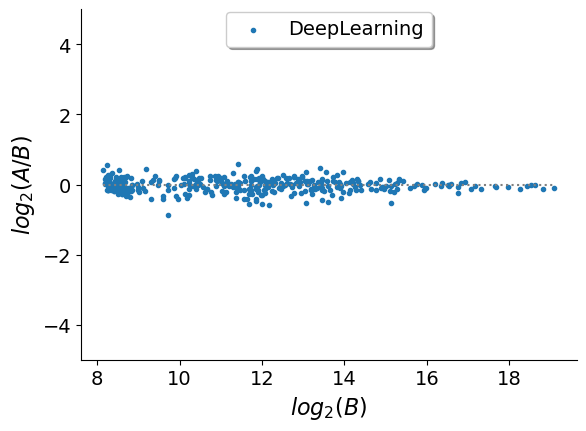

In [2]:
fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i in range(len(species)):
    temp = total[total['Species'] == species[i]]

    plt.scatter(temp['LogB'], temp['LogRatio'], marker='.', label='DeepLearning')
    plt.hlines(y=ratios[i], xmin=min(total['LogB']), xmax=max(total['LogB']), linestyles=':',
               color='gray')  # 水平线：hlines(y, xmin, xmax) 竖直线：vlines(x, ymin, ymax)

plt.xlabel("$log_2(B)$", fontsize=16)
plt.ylabel("$log_2(A/B)$", fontsize=16)
# plt.xlim((10,25))
plt.ylim((-5, 5))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.02),fancybox=True, shadow=True,ncol=1,fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.subplots_adjust(bottom=0.15)
plt.savefig("PXD030327_deep_AB.svg",dpi=200)

In [3]:
len(list(temp['LogRatio'])),len(list(temp['avg_B']))

(395, 395)

In [4]:
tertiles = np.percentile(temp['avg_B'], [100 / 3, 200 / 3])  # logB的2个三分位数

part1 = temp[temp['avg_B'] < tertiles[0]]
part2 = temp[temp['avg_B'] >= tertiles[0]]
part2 = part2[part2['avg_B'] < tertiles[1]]
part3 = temp[temp['avg_B'] >= tertiles[1]]
HUMAN1=[]
HUMAN2=[]
HUMAN3=[]
HUMAN=[]
HUMAN1.append(len([i for i in list(part1['LogRatio']) if i<-0.5])/float(len(list(part1['LogRatio']))))
HUMAN1.append(len([i for i in list(part1['LogRatio']) if i>=-0.5 and i<-0.3])/float(len(list(part1['LogRatio']))))
HUMAN1.append(len([i for i in list(part1['LogRatio']) if i>=-0.3 and i<-0.1])/float(len(list(part1['LogRatio']))))
HUMAN1.append(len([i for i in list(part1['LogRatio']) if i>=-0.1 and i<0.1])/float(len(list(part1['LogRatio']))))
HUMAN1.append(len([i for i in list(part1['LogRatio']) if i>=0.1 and i<0.3])/float(len(list(part1['LogRatio']))))
HUMAN1.append(len([i for i in list(part1['LogRatio']) if i>=0.3 and i<0.5])/float(len(list(part1['LogRatio']))))
HUMAN1.append(len([i for i in list(part1['LogRatio']) if i>=0.5])/float(len(list(part1['LogRatio']))))

HUMAN2.append(len([i for i in list(part2['LogRatio']) if i<-0.5])/float(len(list(part2['LogRatio']))))
HUMAN2.append(len([i for i in list(part2['LogRatio']) if i>=-0.5 and i<-0.3])/float(len(list(part2['LogRatio']))))
HUMAN2.append(len([i for i in list(part2['LogRatio']) if i>=-0.3 and i<-0.1])/float(len(list(part2['LogRatio']))))
HUMAN2.append(len([i for i in list(part2['LogRatio']) if i>=-0.1 and i<0.1])/float(len(list(part2['LogRatio']))))
HUMAN2.append(len([i for i in list(part2['LogRatio']) if i>=0.1 and i<0.3])/float(len(list(part2['LogRatio']))))
HUMAN2.append(len([i for i in list(part2['LogRatio']) if i>=0.3 and i<0.5])/float(len(list(part2['LogRatio']))))
HUMAN2.append(len([i for i in list(part2['LogRatio']) if i>=0.5])/float(len(list(part2['LogRatio']))))

HUMAN3.append(len([i for i in list(part3['LogRatio']) if i<-0.5])/float(len(list(part3['LogRatio']))))
HUMAN3.append(len([i for i in list(part3['LogRatio']) if i>=-0.5 and i<-0.3])/float(len(list(part3['LogRatio']))))
HUMAN3.append(len([i for i in list(part3['LogRatio']) if i>=-0.3 and i<-0.1])/float(len(list(part3['LogRatio']))))
HUMAN3.append(len([i for i in list(part3['LogRatio']) if i>=-0.1 and i<0.1])/float(len(list(part3['LogRatio']))))
HUMAN3.append(len([i for i in list(part3['LogRatio']) if i>=0.1 and i<0.3])/float(len(list(part3['LogRatio']))))
HUMAN3.append(len([i for i in list(part3['LogRatio']) if i>=0.3 and i<0.5])/float(len(list(part3['LogRatio']))))
HUMAN3.append(len([i for i in list(part3['LogRatio']) if i>=0.5])/float(len(list(part3['LogRatio']))))

HUMAN.append(len([i for i in list(temp['LogRatio']) if i<-0.5])/float(len(list(temp['LogRatio']))))
HUMAN.append(len([i for i in list(temp['LogRatio']) if i>=-0.5 and i<-0.3])/float(len(list(temp['LogRatio']))))
HUMAN.append(len([i for i in list(temp['LogRatio']) if i>=-0.3 and i<-0.1])/float(len(list(temp['LogRatio']))))
HUMAN.append(len([i for i in list(temp['LogRatio']) if i>=-0.1 and i<0.1])/float(len(list(temp['LogRatio']))))
HUMAN.append(len([i for i in list(temp['LogRatio']) if i>=0.1 and i<0.3])/float(len(list(temp['LogRatio']))))
HUMAN.append(len([i for i in list(temp['LogRatio']) if i>=0.3 and i<0.5])/float(len(list(temp['LogRatio']))))
HUMAN.append(len([i for i in list(temp['LogRatio']) if i>=0.5])/float(len(list(temp['LogRatio']))))


In [5]:
len([i for i in list(temp['LogRatio']) if i>-0.25 and i<0.25])

334

In [6]:
len([i for i in list(temp['LogRatio']) if i>-0.25 and i<0.25])/float(len(list(temp['LogRatio'])))

0.8455696202531645

In [7]:
data = [HUMAN1,HUMAN2,HUMAN3,HUMAN]

In [8]:
data = np.array(data).T

In [9]:
data.shape

(7, 4)

In [10]:
row_label = ["(-\u221e,-0.5)","[-0.5,-0.3)","[-0.3,-0.1)","[-0.1,0.1)","[0.1,0.3)","[0.3,0.5)","[0.5,\u221e)"]
row_label = row_label[::-1]
col_label = [
    'HUMAN_lower','HUMAN_middle','HUMAN_upper','HUMAN',
]

In [11]:
data

array([[0.00757576, 0.02290076, 0.02272727, 0.01772152],
       [0.03787879, 0.0610687 , 0.02272727, 0.04050633],
       [0.28787879, 0.22900763, 0.22727273, 0.24810127],
       [0.46212121, 0.35877863, 0.50757576, 0.44303797],
       [0.16666667, 0.29007634, 0.18939394, 0.21518987],
       [0.03030303, 0.03053435, 0.03030303, 0.03037975],
       [0.00757576, 0.00763359, 0.        , 0.00506329]])

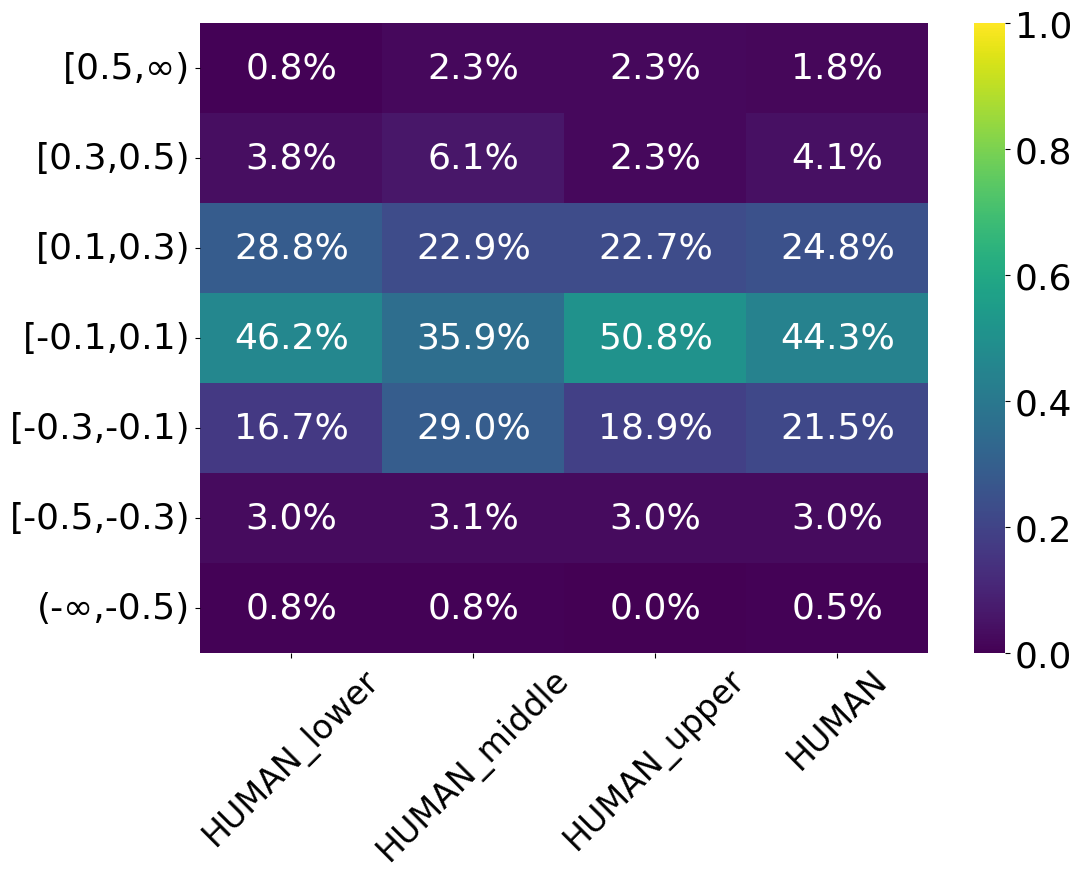

In [12]:
import seaborn as sns
# CommonNumArray_figs = []
CommonNumArray_deep = []
for i in range(len(row_label)):
    # tmp_figs = []
    tmp_deep = []
    for j in range(len(col_label)):
        # tmp_figs.append(len(set(figs_identify[i])&set(figs_identify[j])))
        tmp_deep.append(data[i][j])
    # CommonNumArray_figs.append(tmp_figs)
    CommonNumArray_deep.append(tmp_deep)



fig, ax = plt.subplots(figsize=(13, 10)) # 设置画面大小
# ax.xaxis.set_ticks_position('top') # X轴在上方显示
plt.xticks(fontsize=24,rotation=45)
plt.yticks(fontsize=26)

# 显示数值
# sns.heatmap(CommonNumArray, annot=True, square=True, cbar=False, linewidths=0.3, fmt='d', cmap="Blues", 
#             xticklabels = labels, yticklabels = labels)
# 不显示数值
# fig = sns.heatmap(CommonNumArray_figs, annot=False, square=True, cbar=True,cbar_kws={"shrink": 0.82}, linewidths=0.01, fmt='d', cmap="YlGnBu", # "Blues"
#             vmin=10000, xticklabels = labels, yticklabels = labels)

deep = sns.heatmap(CommonNumArray_deep, 
                   annot=True, 
                   annot_kws = {"size": 26,#"color": 'black', "weights": 'bold',   
                   },
                #    square=True, 
                #    cbar=True,
                #    cbar_kws={"shrink": 0.82}, 
                #    linewidths=0.01, 
                   fmt='.1%', 
                   cmap='viridis', # "Blues"
                    vmin=0, 
                    vmax=1,
                    xticklabels = col_label, 
                    yticklabels = row_label)

cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=26) #设置刻度字体
plt.subplots_adjust(bottom=0.25, left=0.2)
# plt.savefig("PXD040205_SN_heat.jpg",dpi=200)

In [13]:
total = inter_A.join(inter_B.set_index('peptide'),on='peptide',how='outer')

In [14]:
total

,peptide,A1,A2,A3,A4,B1,B2,B3,B4
0,1433B,2890.564850,3009.271759,3163.594513,3055.967560,3647.431030,3553.157715,3469.978333,2518.481964
1,1433E,8944.185837,5846.318329,10151.943176,8609.762100,7226.966980,6154.670929,9710.999481,7101.692444
2,1433F,2633.762634,4937.450897,6975.324799,4292.646576,6665.857086,2408.006409,12017.276611,8871.899017
3,1433G,1624.346405,1670.684265,1178.768188,1533.335480,1649.387848,1516.657440,1767.175537,2012.645813
4,1433S,319.243958,670.456451,386.967834,322.236847,314.365967,388.538544,265.499786,721.587250
...,...,...,...,...,...,...,...,...,...
1446,ZNFX1,1230.222290,629.461243,4374.132324,1625.972168,1747.339966,598.273804,529.339233,NaN
1447,ZO2,711.071594,739.879181,777.440491,693.499573,745.999603,776.890228,406.957367,381.529205
1448,ZPI,19161.450897,16598.347260,15200.692383,20734.653671,20655.679489,20178.052948,22031.700317,17206.309937
1449,ZSC16,362.103973,317.173767,288.013550,NaN,432.521515,349.821259,NaN,374.892242


In [15]:
from pandas import Series
def calc_corr(a,b):
    s1=Series(a)
    s2=Series(b)
    return s1.corr(s2)

corr1=list(total['A1'])
corr2=list(total['A2'])
corr3=list(total['A3'])
corr4=list(total['A4'])
corr5=list(total['B1'])
corr6=list(total['B2'])
corr7=list(total['B3'])
corr8=list(total['B4'])
corr_list=[corr1,corr2,corr3,corr4,corr5,corr6,corr7,corr8]

calc_corr_list=[]
for i in corr_list:
    for j in corr_list:
        calc_corr_list.append(calc_corr(i,j))

In [16]:
np.mean(calc_corr_list),np.min(calc_corr_list)

(0.9937602818202712, 0.9796373700279501)

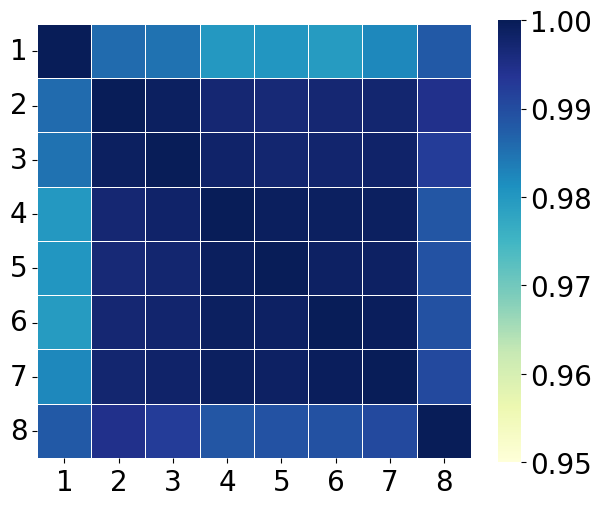

In [17]:
import seaborn as sns
CommonNumArray_deep = []
for i in corr_list:
    tmp_deep = []
    for j in corr_list:
        tmp_deep.append(calc_corr(i,j))
    CommonNumArray_deep.append(tmp_deep)

labels = ['1','2','3','4','5','6','7','8']

fig, ax = plt.subplots(figsize=(7, 7)) # 设置画面大小
# ax.xaxis.set_ticks_position('top') # X轴在上方显示
# ax.set_yticklabels(ylabels,rotation=30)
# 显示数值
# sns.heatmap(CommonNumArray, annot=True, square=True, cbar=False, linewidths=0.3, fmt='d', cmap="Blues", 
#             xticklabels = labels, yticklabels = labels)
# 不显示数值
# fig = sns.heatmap(CommonNumArray_figs, annot=False, square=True, cbar=True,cbar_kws={"shrink": 0.82}, linewidths=0.01, fmt='d', cmap="YlGnBu", # "Blues"
#             vmin=10000, xticklabels = labels, yticklabels = labels)

deep = sns.heatmap(CommonNumArray_deep, annot=False, square=True, cbar=True,cbar_kws={"shrink": 0.82}, linewidths=0.01, fmt='d', cmap="YlGnBu", # "Blues"
            vmin=0.95, xticklabels = labels, yticklabels = labels)
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=0)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=20) #设置刻度字体
# plt.savefig("PXD040205_SN_corr.jpg",dpi=200)